In [ ]:
# 1단계 (다운완료)
!apt install fonts-nanum
!ls /usr/share/fonts/truetype/nanum/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,363 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothicBold.ttf  NanumMyeongjoBold.ttf  NanumSquareRoundR.ttf
NanumBarunGothi

In [ ]:
# 2단계
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font = fm.FontProperties(fname=font_path, size=9)
fm._rebuild()

# 3단계 (수동으로 런타임 재시작을 안 해도 됨, 실행버튼은 다시 눌러야 함.)
import os
os.kill(os.getpid(), 9)

# 환경세팅

In [ ]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 4단계 (최종설정)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
import seaborn as sns

font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=font_path, size=9).get_name()

# sns 설정
sns.set(font=font_name, 
        rc={"axes.unicode_minus":False,
            'figure.figsize': (10,6)},    
        style='darkgrid')
fm._rebuild()

pd.plotting.register_matplotlib_converters()

In [ ]:
sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False, 'figure.figsize': (10,6)},
        style='darkgrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path="/content/drive/MyDrive/lotte_competition/data"
# base_path = "/content/drive/MyDrive/Colab Notebooks/for_Check"

In [ ]:
file_path_dic = {
    'demo':'LPOINT_BIG_COMP_01_DEMO.csv',
    'pdde':'LPOINT_BIG_COMP_02_PDDE.csv',
    'cop_u':'LPOINT_BIG_COMP_03_COP_U.csv',
    'pd_clac':'LPOINT_BIG_COMP_04_PD_CLAC.csv',
    'br':'LPOINT_BIG_COMP_05_BR.csv',
    'lpay':'LPOINT_BIG_COMP_06_LPAY.csv',
}

# 데이터 로드

## df_cust
- csv_user_merged_colplus.csv
  - 상품구매정보와 제휴사이용정보 concat 후, 세그먼트 라벨링

In [ ]:
df_cust = pd.read_csv(os.path.join(base_path,'csv_user_merged_copPlus.csv'))

In [ ]:
df_cust = df_cust[["cust", "grade_first", "grade_second", "label"]]
df_cust.head(3)

,cust,grade_first,grade_second,label
0,M000034966,일반고객,일반고객,일반고객/일반고객
1,M000059535,기타고객,비활동고객,기타고객/비활동고객
2,M000136117,최우수고객,최우수고객,최우수고객/최우수고객


## 데이터셋

- df_demo: 고객 데모 정보
- df_pdde: 상품 구매 정보
- df_cop_u:제휴사 이용 정보
- df_lpay:엘페이 이용
- df_pd_clac:상품 분류 정보

In [ ]:
df_demo = pd.read_csv(os.path.join(base_path, file_path_dic['demo']))
df_pdde = pd.read_csv(os.path.join(base_path, file_path_dic['pdde']), dtype={'de_dt':str, 'de_hr':str})
df_cop_u = pd.read_csv(os.path.join(base_path, file_path_dic['cop_u']), dtype={'de_dt':str, 'de_hr':str})
df_lpay = pd.read_csv(os.path.join(base_path, file_path_dic['lpay']), dtype={'de_dt':str, 'de_hr':str})
df_pd_clac = pd.read_csv(os.path.join(base_path, file_path_dic['pd_clac']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_pdde["de_dthr"] = pd.to_datetime(df_pdde.de_dt.str.cat(df_pdde.de_hr), format='%Y%m%d%H')
df_pdde.drop(labels=['de_dt','de_hr'], axis=1, inplace=True)
df_cop_u["de_dthr"] = pd.to_datetime(df_cop_u.de_dt.str.cat(df_cop_u.de_hr), format='%Y%m%d%H')
df_cop_u.drop(labels=['de_dt','de_hr'], axis=1, inplace=True)
df_lpay["de_dthr"] = pd.to_datetime(df_lpay.de_dt.str.cat(df_lpay.de_hr), format='%Y%m%d%H')
df_lpay.drop(labels=['de_dt','de_hr'], axis=1, inplace=True)

# 데이터 준비

**1. 제휴사 유통사 통합 (concat)**

In [ ]:
df_buy = pd.concat([df_pdde, df_cop_u])

In [ ]:
df_buy.head(3)

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,buy_am,buy_ct,de_dthr,vst_dt
0,M430112881,A01000001113,1,A01,A010039,PD0290,15000.0,1.0,2021-01-01 10:00:00,NaN
1,M646853852,A01000002265,1,A01,A010025,PD1369,79700.0,1.0,2021-01-01 10:00:00,NaN
2,M430112881,A01000003148,1,A01,A010039,PD0290,19000.0,1.0,2021-01-01 10:00:00,NaN


cust.nunique() 다른 이유
- df_demo > df_buy
  - 엘페이 결제 정보가 없으므로 더 적을 수 있음
- df_buy > df_cust
  - 상반기-비활동고객의 경우가 없음.
  - (df_buy, df_cust) left 조인을 한다면, null 값은 상반기-비활동인 경우임.

In [ ]:
print(df_demo.cust.nunique())   # 전체 고객 정보
print(df_buy.cust.nunique())    # 제휴사 + 유통사 정보
print(df_cust.cust.nunique())   # 세그먼트 있는 정보

29913
29756
27443


**2. 데이터셋 조인**
- df_cust: 세그먼트
- df_buy: 구매정보(제휴사+유통사 통합)
- df_demo: [성별, 나이, 지역]

aggregation - df_buy

In [ ]:
df_buy = df_buy.groupby(['cust']).agg({'rct_no':'nunique'}).reset_index()

1. df_cust, df_buy 조인
- df_cust: 세그먼트
- df_buy: 구매정보(제휴사+유통사 통합)

In [ ]:
temp = (df_buy.merge(df_cust, on=['cust'], how='outer')).fillna('신규고객')
temp.isnull().sum()

cust            0
rct_no          0
grade_first     0
grade_second    0
label           0
dtype: int64

2. df_cust, df_buy 조인한 후, df_demo[성별, 나이, 지역] 조인
\+ df_demo 조인

In [ ]:
df_buy = df_demo.merge(temp, on=['cust'], how='right')

In [ ]:
df_buy.head(3)

,cust,ma_fem_dv,ages,zon_hlv,rct_no,grade_first,grade_second,label
0,M000034966,여성,40대,Z07,13,일반고객,일반고객,일반고객/일반고객
1,M000059535,여성,30대,Z12,1,기타고객,비활동고객,기타고객/비활동고객
2,M000136117,여성,30대,Z11,85,최우수고객,최우수고객,최우수고객/최우수고객


**3. 엘페이 전처리 및 aggregation**

In [ ]:
df_buy_lpay = (df_lpay.groupby(['cust']).agg({'rct_no':'nunique'}).add_prefix(f'{""}lpay_'))

In [ ]:
df_buy_lpay

,lpay_rct_no
cust,
M000136117,4
M000419293,42
M000494848,94
M000557840,38
M000871427,5
...,...
M999227380,2
M999268192,30
M999599111,77


**엘페이 조인**
- 앞서 조인한 결과와 엘페이 정보 조인함

In [ ]:
df_all = df_buy.merge(df_buy_lpay, on=['cust'], how='left').fillna(0)

# LGBM 결과 분석

## 엘페이 이용률

In [ ]:
df_all.columns

Index(['cust', 'ma_fem_dv', 'ages', 'zon_hlv', 'rct_no', 'grade_first',
       'grade_second', 'label', 'lpay_rct_no'],
      dtype='object')

In [ ]:
# 한 행은 한 고객의 정보
df_nlpay = df_all[["rct_no", "lpay_rct_no", "cust", "label"]].rename_axis('cust_no')
df_nlpay

,rct_no,lpay_rct_no,cust,label
cust_no,,,,
0,13,0.0,M000034966,일반고객/일반고객
1,1,0.0,M000059535,기타고객/비활동고객
2,85,4.0,M000136117,최우수고객/최우수고객
3,5,0.0,M000201112,신규고객
4,88,0.0,M000225114,일반고객/최우수고객
...,...,...,...,...
29751,2,0.0,M999708287,신규고객
29752,137,79.0,M999770689,최우수고객/최우수고객
29753,35,0.0,M999849895,일반고객/일반고객


In [ ]:
df_nlpay["lpay_prob"] = df_nlpay.lpay_rct_no / df_nlpay.rct_no
# prob > 1인 경우, 1210개 - 이 경우, 데이터 트래젝션이 잘못되어서 1보다 큰 경우가 나옴. 실제로 1보다 큰 경우가 나오지 않기 때문에 모두 1로 만듬
df_nlpay.loc[df_nlpay.lpay_prob > 1, 'lpay_prob'] = 1.0

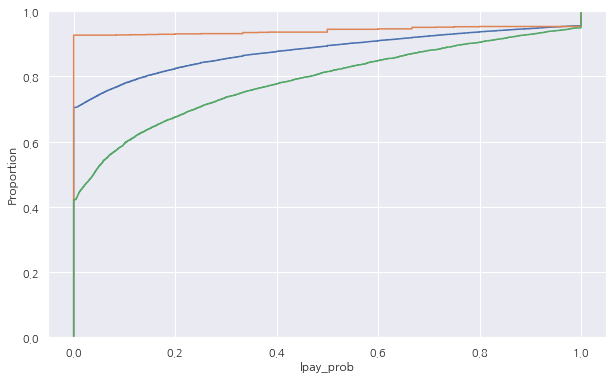

In [ ]:
sns.ecdfplot((df_nlpay.sort_values('lpay_prob').reset_index()).lpay_prob) # 파란색
temp = df_nlpay.query('label == "기타고객/비활동고객"')
sns.ecdfplot((temp.sort_values('lpay_prob').reset_index()).lpay_prob) # 주황색
temp2 = df_nlpay.query('label == "최우수고객/최우수고객"')
sns.ecdfplot((temp2.sort_values('lpay_prob').reset_index()).lpay_prob) # 초록색

In [ ]:
df_all_clean = df_all[['cust', 'ma_fem_dv', 'ages', 'zon_hlv','grade_first', 'grade_second','label']].set_index('cust')
#기타-비활동
df_out = df_all_clean.query("label == '기타고객/비활동고객'")
#최우수-최우수
df_vip = df_all_clean.query("label == '최우수고객/최우수고객'")

## 상품 구매 정보 분석

In [ ]:
df_all_pdde = pd.merge(df_all_clean,df_pdde.set_index('cust'), right_index=True, left_index=True, how="inner")
df_out_pdde = pd.merge(df_out,df_pdde.set_index('cust'), right_index=True, left_index=True, how="inner")
df_vip_pdde = pd.merge(df_vip,df_pdde.set_index('cust'), right_index=True, left_index=True, how="inner")

## 온오프 통계 분석

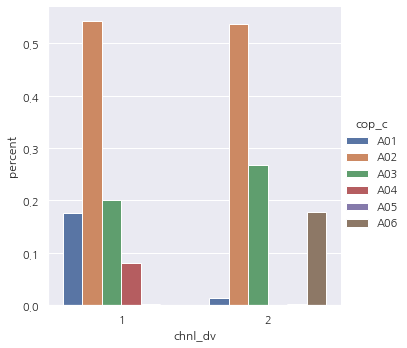

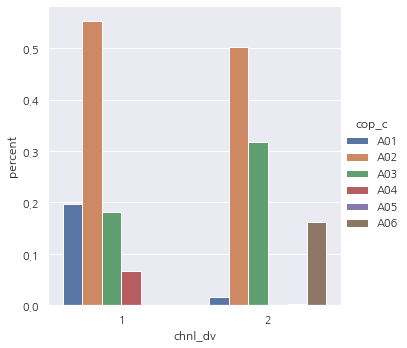

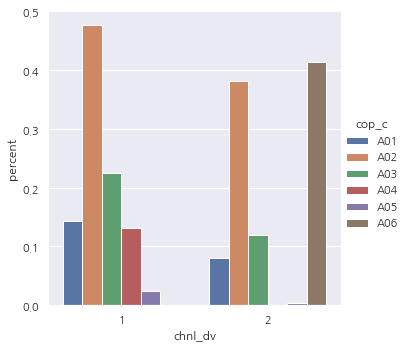

In [ ]:
df1 = (df_all_pdde
.groupby('chnl_dv')['cop_c']
.value_counts(normalize=True)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x="chnl_dv",y='percent',hue="cop_c",kind='bar', hue_order=['A01','A02','A03','A04','A05','A06']))
df2 = (df_vip_pdde
.groupby('chnl_dv')['cop_c']
.value_counts(normalize=True)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x="chnl_dv",y='percent',hue="cop_c",kind='bar', hue_order=['A01','A02','A03','A04','A05','A06']))
df3 = (df_out_pdde
.groupby('chnl_dv')['cop_c']
.value_counts(normalize=True)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x="chnl_dv",y='percent',hue="cop_c",kind='bar', hue_order=['A01','A02','A03','A04','A05','A06']))

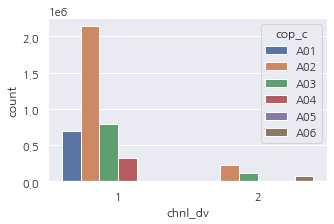

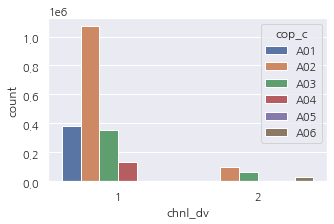

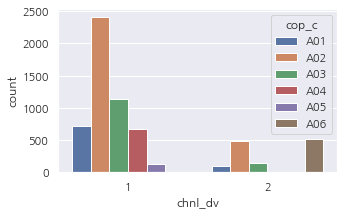

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_all_pdde, x="chnl_dv", hue="cop_c", hue_order=['A01','A02','A03','A04','A05','A06'])
plt.show()
plt.figure(figsize=(5,3))
sns.countplot(data=df_vip_pdde, x="chnl_dv", hue="cop_c", hue_order=['A01','A02','A03','A04','A05','A06'])  #, order=df_vip_pdde.cop_c.value_counts().sort_index().index)
plt.show()
plt.figure(figsize=(5,3))
sns.countplot(data=df_out_pdde, x="chnl_dv", hue="cop_c", hue_order=['A01','A02','A03','A04','A05','A06'])
plt.show()

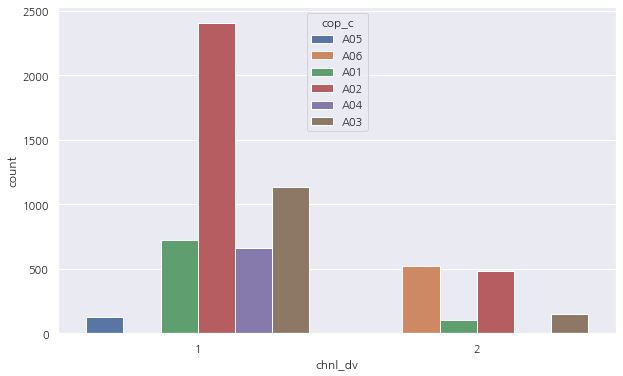

In [ ]:
sns.countplot(data=df_out_pdde, x="chnl_dv", hue="cop_c")

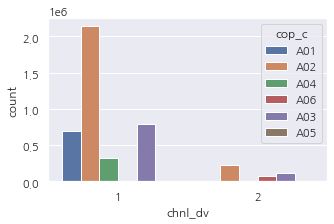

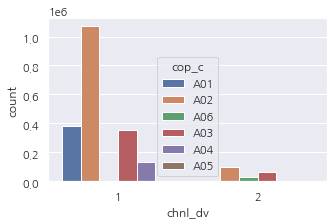

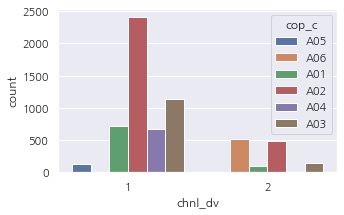

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_all_pdde, x="chnl_dv", hue="cop_c")
plt.show()
plt.figure(figsize=(5,3))
sns.countplot(data=df_vip_pdde, x="chnl_dv", hue="cop_c")
plt.show()
plt.figure(figsize=(5,3))
sns.countplot(data=df_out_pdde, x="chnl_dv", hue="cop_c")
plt.show()

## 제휴사 이용 정보 분석

In [ ]:
df_all_cop = pd.merge(df_all_clean,df_cop_u.set_index('cust'), right_index=True, left_index=True, how="inner")
df_out_cop = pd.merge(df_out,df_cop_u.set_index('cust'), right_index=True, left_index=True, how="inner")
df_vip_cop = pd.merge(df_vip,df_cop_u.set_index('cust'), right_index=True, left_index=True, how="inner")

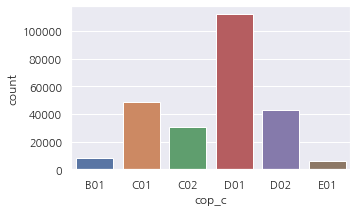

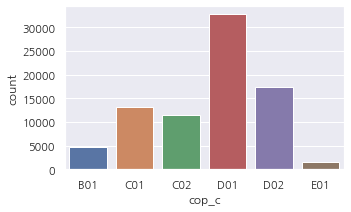

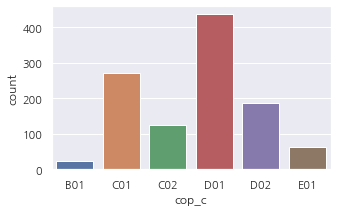

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_all_cop, x="cop_c", order=df_all_cop.cop_c.value_counts().sort_index().index)
plt.show()
plt.figure(figsize=(5,3))
sns.countplot(data=df_vip_cop, x="cop_c", order=df_vip_cop.cop_c.value_counts().sort_index().index)
plt.show()
plt.figure(figsize=(5,3))
sns.countplot(data=df_out_cop, x="cop_c", order=df_out_cop.cop_c.value_counts().sort_index().index)
plt.show()

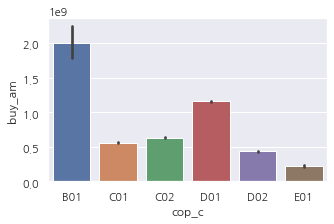

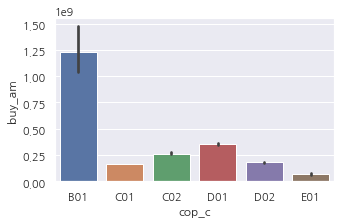

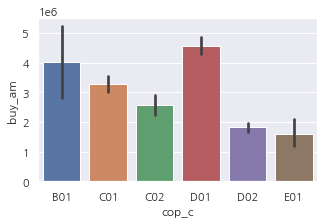

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=df_all_cop, x="cop_c", y="buy_am", estimator=np.sum, order=df_all_cop.cop_c.value_counts().sort_index().index)
plt.show()
plt.figure(figsize=(5,3))
sns.barplot(data=df_vip_cop, x="cop_c", y="buy_am", estimator=np.sum, order=df_vip_cop.cop_c.value_counts().sort_index().index)
plt.show()
plt.figure(figsize=(5,3))
sns.barplot(data=df_out_cop, x="cop_c", y="buy_am", estimator=np.sum, order=df_out_cop.cop_c.value_counts().sort_index().index)
plt.show()

## KL divergence 분석


- 카운트 분포화하여 KL-divergence 이용 정렬 (P=기타/비활성, Q=전체고객)
- 도드라지게 차이나는 제휴사를 집중하기로 함 (P=기타/비활성, Q=전체고객)


### 온/오프라인 카운트 분석

In [ ]:
P = df_out_pdde.groupby('chnl_dv')['cop_c'].value_counts()
Q = df_all_pdde.groupby('chnl_dv')['cop_c'].value_counts()

In [ ]:
P /= P.sum()
Q /= Q.sum()

In [ ]:
P_ = P + 1e-6
Q_ = Q + 1e-6

In [ ]:
dl = pd.Series(P_ * (np.log(P_) - np.log(Q_)))

In [ ]:
dl.sort_values()

chnl_dv  cop_c
1        A02     -0.095287
         A01     -0.037293
2        A03     -0.002205
1        A03     -0.001247
2        A05      0.000882
         A02      0.028749
         A01      0.039198
1        A04      0.039708
         A05      0.049149
2        A06      0.129672
Name: cop_c, dtype: float64

### 상품 구매 정보 제휴사 카운트 분석

In [ ]:
P = df_out_pdde['cop_c'].value_counts()
Q = df_all_pdde['cop_c'].value_counts()

In [ ]:
P /= P.sum()
Q /= Q.sum()

In [ ]:
P_ = P + 1e-6
Q_ = Q + 1e-6

In [ ]:
dl = pd.Series(P_ * (np.log(P_) - np.log(Q_)))

In [ ]:
dl.sort_values()

A02   -0.077366
A01   -0.026490
A03   -0.003531
A04    0.039708
A05    0.048880
A06    0.129672
Name: cop_c, dtype: float64

### 제휴사 이용 정보 카운트 분석

In [ ]:
P = df_out_cop['cop_c'].value_counts()
Q = df_all_cop['cop_c'].value_counts()

In [ ]:
P /= P.sum()
Q /= Q.sum()

In [ ]:
P_ = P + 1e-6
Q_ = Q + 1e-6

In [ ]:
dl = pd.Series(P_ * (np.log(P_) - np.log(Q_)))

In [ ]:
dl.sort_values()

D01   -0.052354
C02   -0.009343
B01   -0.008854
D02   -0.005452
E01    0.046484
C01    0.056444
Name: cop_c, dtype: float64